# Phyiscs Problems - Lectures 18 & 19 - Homework 9 

FALL 2023


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a program that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [3]:
G = 6.67 * (10**(-11))
M = 5.97 * (10 **(24))
R = (6371 * 1000)
Pi = 3.1415


def Height_Calculator(T):
    top_part = (G*M*(T)**2)
    bottom_part = (4 * (Pi)**2)
    return (((top_part/bottom_part)**(1/3))-R)



Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [38]:
for i in range(86401):
    if i == 2700:
        print('For a 45 minute orbit', Height_Calculator(i),'m which means this value is not possible') 
    if i == 5400:
        print('For a 90 minute orbit', Height_Calculator(i), 'm')
    if i == 86400:
        print('For a 24 hour orbit', Height_Calculator(i), 'm')

#From these calculations, we can conclude that our satellite is going farther and farther away from earth.        
        


For a 45 minute orbit -2181477.524261743 m which means this value is not possible
For a 90 minute orbit 279452.3852313245 m
For a 24 hour orbit 35856740.4495225 m


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [22]:
print('The difference of 23.93 hours and 24 hours is a distance of',Height_Calculator(86400)-Height_Calculator(86148),'m')



The difference of 23.93 hours and 24 hours is a distance of 82149.46148552746


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

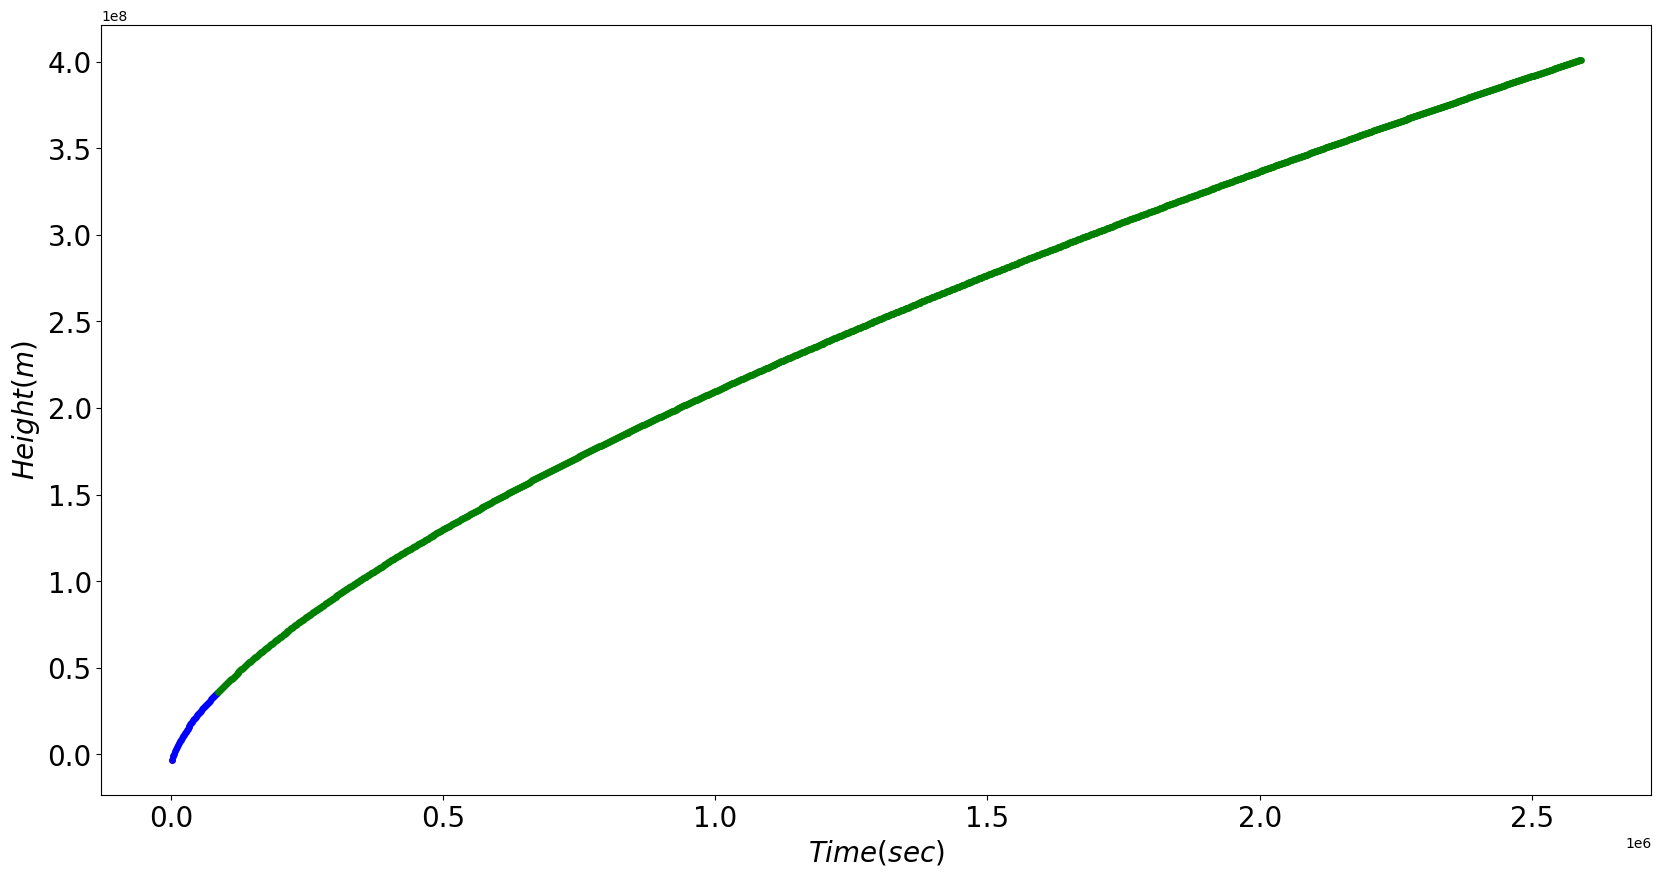

In [86]:
import numpy as np
from matplotlib import pyplot as plt
Height_List = []
Time_List = []
for i in range(2592000):

    if i % 1800 == 0  and i != 0:
        Height_List.append(Height_Calculator(i))
        Time_List.append(i)

Height_array = np.array([Height_List])
Time_array = np.array([Time_List])

fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(Time_array[Height_array<0],Height_array[Height_array<0],s=15,c='r')
ax1.scatter(Time_array[Height_array<Height_Calculator(86148)],Height_array[Height_array<Height_Calculator(86148)],s=15,c='b')
ax1.scatter(Time_array[Height_array>Height_Calculator(86148)],Height_array[Height_array>Height_Calculator(86148)],s=15,c='g')
ax1.set_xlabel("$Time(sec)$",size=20)
ax1.set_ylabel("$Height(m)$",size=20)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)



### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [54]:
import numpy as np
def Lorentz_Transform(x,v):
    gamma = (1/np.sqrt(1-((v)**2/(1**2))))
    t_earth = x / v
    t_prime_spaceship = gamma * (t_earth - v * x)
    return t_prime_earth, t_prime_spaceship


Lorentz_Transform(10., 0.999)

(10.01001001001001, 0.4475493274496109)

#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [55]:
print(Lorentz_Transform(10, 0.9))
print(Lorentz_Transform(10, 0.98))
print(Lorentz_Transform(10, 0.999))

(11.11111111111111, 4.843221048378526)
(10.204081632653061, 2.0305866063400337)
(10.01001001001001, 0.4475493274496109)


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [56]:
def Quadratic_Equation(a,b,c):
    quadratic_plus = ((-b) + np.sqrt((b)**2 - (4*a*c))) / (2 * a)
    quadratic_minus = ((-b) - np.sqrt((b)**2 - (4*a*c))) / (2 * a)
    return quadratic_plus, quadratic_minus

Quadratic_Equation(0.001,1000, 0.001)

(-9.999894245993346e-07, -999999.999999)

There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [95]:
def Quadratic_Equation_Inverse(a,b,c):
    quadratic_plus = ((-b) + np.sqrt((b)**2 - (4*a*c))) / (2 * a)
    quadratic_minus = ((-b) - np.sqrt((b)**2 - (4*a*c))) / (2 * a)
    quad_plus_inv = (2 * c) / ((-b) + np.sqrt((b)**2 - (4*a*c)))
    quad_minus_inv = (2 * c) / ((-b) - np.sqrt((b)**2 - (4*a*c)))
    return quadratic_plus, quadratic_minus, quad_plus_inv, quad_minus_inv

def Quad_correct(a,b,c):
    quadratic_plus = np.round(((-b) + (np.sqrt((b)**2 - (4*a*c)))) / (2 * a),9)
    quadratic_minus = np.round(((-b) - (np.sqrt((b)**2 - (4*a*c)))) / (2 * a),5)
    quad_plus_inv = np.round((2 * c) / ((-b) + (np.sqrt((b)**2 - (4*a*c)))),-2)
    quad_minus_inv = np.round((2 * c) / ((-b) - (np.sqrt((b)**2 - (4*a*c)))),9)

    return quadratic_plus, quadratic_minus, quad_minus_inv, quad_plus_inv

Quad_correct(0.001,1000, 0.001)

NameError: name 'quad_minus_inv' is not defined

Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases.

### 4) Planetary orbits

The orbit in space of one body around another, such as a planet around the Sun, need not be circular. In general it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. If you are given the distance $l_1$ of closest approach that a planet makes to the Sun, also called its perihelion, and its linear velocity $v_1$ at *perihelion*, then any other property of the orbit can be calculated from these two as follows.

Kepler’s second law tells us that the distance $l_2$ and velocity $v_2$ of the planet at its most distant point, or *aphelion*, satisfy $l_2 v_2 = l_1 v_1$. 


Given the values of $v_1$, $l_1$, and $l_2$, other parameters of the orbit are given by simple formulas can that be derived from Kepler’s laws and the fact that the orbit is an ellipse:

Semi-Major Axis $$ a = \frac{1}{2} (l_1 + l_2) $$ 
Semi-Minor Axis: $$ b = \sqrt{l_1  l_2} $$ 
Orbital Period: $$ T = \frac{2 \pi a b}{l_1 v_1} $$ 
Orbital eccentricity:  $$ e = \frac{l_2 - l_1}{l_2 + l_1}$$

#### Write a program with functions that asks the user to enter the distance to the Sun and velocity at perihelion, then calculates and prints the quantities $l2$, $v2$, $a$, $b$, $T$, and $e$.




#### Test your program by having it calculate the properties of the orbits of the Earth (for which $l_1 = 1.4710 \times 10^{11}$ m and $v_1 = 3.0287 \times 10^4$ m s$^{−1}$ ) and Halley’s comet ($l_1 = 8.7830 \times 10^{10}$ m and $v_1 = 5.4529 \times 10^4$ m s${−1}$ ). Among other things, you should find that the orbital period of the Earth is one year and that of Halley’s comet is about 76 years.

In [23]:
import numpy as np
G = 6.67e-11
M = 5.97e+24

def Main_Code(l1,v1): 
    b=-2*G*M/(v1*l1)
    c=-(v1**2-(2*G*M/l1))
    print('Sec Coeff',b)
    print('Third coeff', c)
    discrim = np.sqrt(((b)**2) - (4 * c))
    v2 = ((-b) + discrim) / 2 #Only positive sign returns real values
    l2 = (v1 * l1) / v2
    print('Second Velo', v2)
    print('Second Length', l2)
    
    a = (1/2)*(l1+l2)
    print('Semi-Major Axis', a)
    
    b = np.sqrt(l1 * l2)
    print('Semi-Minor Axis',b)
    
    T =((2*3.1415*a*b) / (l1*v1)) /(31536000)
    print('Period', T)
    
    ecc = (l2 - l1) / (l2 + l1)
    print('Eccentricity', ecc)

Main_Code(1.471e11,3.0287e4) #Earth
Main_Code(8.7830e10,5.4529e4) #Halley's

Sec Coeff -0.17875624798312326
Third coeff -917296955.0095173
Second Velo 30287.0
Second Length 147100000000.0
Semi-Major Axis 147100000000.0
Semi-Minor Axis 147100000000.0
Period 0.9676468071548967
Eccentricity 0.0
Sec Coeff -0.16628755382536908
Third coeff -2973402773.5059776
Second Velo 54529.0
Second Length 87830000000.0
Semi-Major Axis 87830000000.0
Semi-Minor Axis 87830000000.0
Period 0.3209044963427826
Eccentricity 0.0


In [19]:
Main_Code(147100000000,30287)

Sec Coeff -0.17875624798312326
Third coeff -917296955.0095173
Second Velo 30287.0
Second Length 147100000000.0
Semi-Major Axis 147100000000.0
Semi-Minor Axis 147100000000.0
Period 0.9676468071548967
Eccentricity 0.0


In [185]:
import numpy as np
G = 6.67e-11
M = 5.97e24
def Quadratic_Equation(a,b,c):
    quadratic_plus = ((-b) + np.sqrt((b)**2 - (4*a*c))) / (2 * a)
    quadratic_minus = ((-b) - np.sqrt((b)**2 - (4*a*c))) / (2 * a)
    print(-b)
    print(b**2)
    if quadratic_plus > 0:
        return quadratic_plus
    else:
        return quadratic_minus

def Main_Code(l1,v1):
    second_coefficient_top = 2 * G * M
    print(second_coefficient_top)
    second_coefficient_bottom = (v1*l1)
    print(second_coefficient_bottom)
    second_coefficient = -(second_coefficient_top / second_coefficient_bottom)
    third_coefficient_first = ((v1)**2)
    print(third_coefficient_first)
    third_coefficient_second = (2*G*M) / l1
    print(third_coefficient_second)
    third_coefficient = -(third_coefficient_first - third_coefficient_second)
    print(second_coefficient, third_coefficient)
    v2 = Quadratic_Equation(1, second_coefficient, third_coefficient)
    l2 = (l1*v1) / v2
    a = (1/2)*(l1+l2)
    b = np.sqrt(l1*l2)
    T = (2*3.1415*a*b) / (l1*v1)
    ecc = (l2-l1) / (l2+l1)
    print(v2)
    print('Semi-Major Axis:', a)
    print('Semi-Minor Axis:', b)
    print('Orbital Period', T)
    print('Orbital Eccentricity', ecc)
    
Main_Code(147100000000,30287)   

    


796398000000000.0
4455217700000000
917302369
5413.9904826648535
-0.17875624798312326 -917296955.0095173
0.17875624798312326
0.031953796193003856
30287.0
Semi-Major Axis: 147100000000.0
Semi-Minor Axis: 147100000000.0
Orbital Period 30515709.71043682
Orbital Eccentricity 0.0
